In [11]:
import numpy as np
from collections import defaultdict
import os

import numpy as np
from copy import deepcopy
from tqdm import tqdm
import nle
import gym
from matplotlib import animation
from MyAgent import MyAgent
from Node import Tree
import matplotlib.pyplot as plt

In [13]:
#run mcts on blackjack
rewards = []
done = False
for  j in tqdm(range(1000)):
    bj = gym.make("Blackjack-v0")
    bj.seed(j)
    bj.reset()
    agent = MyAgent(bj.observation_space,bj.action_space,j,10,"Blackjack-v0")
    done = False
    while done == False:
        a = agent.act(None)
        state,reward,done, _ = bj.step(a)
        rewards.append(reward)

In [5]:
#run mcts on 
rewards2 = []
done = False
for  j in tqdm(range(1000)):
    done = False
    while done == False:
        state,reward,done, _ = bj.step(np.random.choice([0,1]))
        rewards2.append(reward)

100%|██████████| 1000/1000 [00:00<00:00, 37821.62it/s]


In [15]:
plt.title('Random agent rewards')
plt.hist(rewards2)
plt.hist(rewards)
plt.legend(['random agent','monte agent'])
plt.xlabel('steps')
plt.ylabel('rewards')
plt.show()

# Cartpole

In [6]:
def save_frames_as_gif(frames, path='./', filename='cp2.gif'):

    #function to animate the frames
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)

    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    a = anim.save(path + filename, writer='imagemagick', fps=60)

In [16]:
#mcts cartpole
_, ax = plt.subplots(1, 1)
cartpole = gym.make('CartPole-v0')
cp_seed = 3
cartpole.seed(cp_seed)
state = cartpole.reset()
img = ax.imshow(cartpole.render(mode='rgb_array'))
done = False
Frames = []
agent = MyAgent(cartpole.observation_space,cartpole.action_space,cp_seed,10,'CartPole-v0')
mcts_cartpole_rewards = []

for i in tqdm(range(200)): #the env is solved if you're upright for more than 199 steps

    a = agent.act(None)
    frame = cartpole.render(mode='rgb_array')
    Frames.append(frame)
    state, reward, done, _ = cartpole.step(a)      
    mcts_cartpole_rewards.append(reward)
    if done:
        break
cartpole.close()

In [17]:
#to save the gif
# save_frames_as_gif(Frames,filename='mcts_cartpole.gif')

  8%|▊         | 16/200 [00:00<00:00, 532.91it/s]


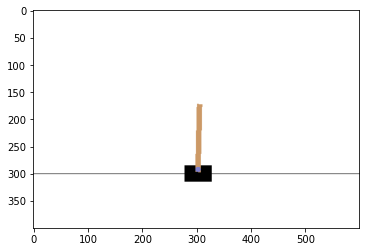

In [18]:
#random agent cartpole
_, ax = plt.subplots(1, 1)
cartpole = gym.make('CartPole-v0')
cp_seed = 3
cartpole.seed(cp_seed)
state = cartpole.reset()
img = ax.imshow(cartpole.render(mode='rgb_array'))
done = False
Frames = []
random_cartpole_rewards = []

for i in tqdm(range(200)): #the env is solved if you're upright for more than 199 steps

    a = np.random.choice([0,1])
    frame = cartpole.render(mode='rgb_array')
    Frames.append(frame)
    state, reward, done, _ = cartpole.step(a)      
    random_cartpole_rewards.append(reward)
    if done:
        break
cartpole.close()

In [19]:
#to save the gif
# save_frames_as_gif(Frames,filename='random_cartpole.gif')

In [20]:
plt.title('Random agent rewards')
plt.plot(random_cartpole_rewards,linewidth=10)
plt.plot(mcts_cartpole_rewards,linewidth=2)
plt.legend(['random agent','monte agent'])
plt.xlabel('steps')
plt.ylabel('rewards')
plt.show()